# VI Kodutöö


# I osa

### Ülesanne 1.1 (**1 punkt**) 

Vaata videot [hierarhilise klasterdamise kohta](https://www.youtube.com/watch?v=7xHsRkOdVwo&ab_channel=StatQuestwithJoshStarmer). Mida (uut) said teada hierarhilisest klasterdamisest?

**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

### Ülesanne 1.2 (**1 punkt**) 

Vaata Johns Hopkinsi videot [logistilise regressiooni kohta](https://www.youtube.com/watch?v=79q9avsyG9Y). Nimeta üks põhjus, miks lineaarne regressioon ei ole mõistlik valik binaarse y-tunnuse modelleerimiseks?

**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

### Ülesanne 1.3 (**2 punkti**) 
Joonista R-is logistiliste kõverate 
$$y = \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}$$
graafikud:

* Ühel joonisel $\beta_0 \in \{-1, 0, 1\}$ ja $\beta_1 = 1$.
* Teisel joonisel $\beta_0 = 0$ ja $\beta_1 \in \{0.5, 1, 2\}$. 

Selgita, millist mõju omab $\beta_0$ ja millist $\beta_1$ muutmine (kommentaarina koodis).

In [ ]:
# Ülesanne 1.3
# sinu kood + kommentaar (millist mõju omab beta0 ja millist beta1 muutmine)


### Ülesanne 1.4 (**1 punkt**) 

Loe artiklit http://www.postimees.ee/2721878/hoiatus-meie-vereproovist. Nimeta jutuks olnud teadusartikli põhitulemus. 

**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

Soovitame sul katsuda jõudu tutvuda ka teadusartikli endaga [Biomarker Profiling by Nuclear Magnetic Resonance Spectroscopy for the Prediction of All-Cause Mortality: An Observational Study of 17,345 Persons](http://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1001606). Järgmises praktikumis kasutame sedasama andmestikku, millel see artikkel põhineb. 


# II osa - käsitsi kirjutatud numbrid

### Sissejuhatus

Andmebaasihaldurile Madis "Select" Baas meeldib süsteemianalüütik Katrin "Süsteemne" Kindlus. Lõuna ajal vahetavad nad salvrätikule kirjutatud binaarkoodis armastuskirju. Täna otsustas Madis Katrinile muljet avaldada ning ehitada automaatse binaarkoodi dekodeerija. Ta sattus aga probleemi otsa - kuidas automaatselt tuvastada, kas käsitsi kirjutatud number on 0 või 1?

Selles praktikumis uurime käsitsi kirjutatud numbrite hingeelu.

### Andmestik

Selleks on meil kasutada andmestik, kus on palju näiteid käsitsi kirjutatud numbritest "0" ja "1". Kõik need näited on 28 x 28 piksli suurused mustvalged pildid. Igale pikslile vastab üks täisarv vahemikus 0, ..., 255, mis näitab antud piksli intensiivsust. Lisaks on kõigi nende näidete kohta teada, millist numbrit on konkreetsel pildil kujutatud. 

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum6/numbrid/numbrid.png "Binaarkood?")

Laadi alla andmestik [numbrid.csv](../data/numbrid.csv). Iga rida vastab ühele pildile. Andmestiku viimane veerg *label* näitab, kas tegu on nulli või ühega. Ülejäänud veerud näitavad vastava piksli intensiivsust, kusjuures pikslid on järjestatud ülalt alla (alates vasakust ülemisest nurgast). 

### Ülesanne 2.1 (2 punkti) - andmestikuga tutvumine

a. Visualiseeri näiteid nii nullide kui ka ühtede seast. 

Näpunäited:

* Abiks on ette antud funktsioon `plot_digit`, mille argumendiks sobib andmestiku üks rida (NB! ilma viimase veeruta)
* Alamjooniste tegemisel on kasuks käsk `par(mfrow = c(mitu_rida, mitu_veergu))`
* Ääriseid saad muuta `par(mar = c(bottom, left, top, right))`
* Selleks, et saada esialgsed graafilisi parameetreid tagasi, võid käituda järgmiselt:

```
# Näiteks
par(mfrow=c(2, 5), mar=c(1, 1, 1, 1) + 0.1)

# Pärast taasta esialgsed graafilised parameetrid
par(mfrow=c(1, 1), mar=c(5, 4, 4, 2) + 0.1)
```

In [ ]:
# Ülesanne 2.1a
plot_digit = function(digit, ...){
  cols = grey(seq(1, 0, length = 256))
  image(t(matrix(as.numeric(digit), nrow=28, ncol=28)[28:1, ]), col = cols, ...)
}

# sinu kood, kus muudad graafilisi parameetreid mfrow ja mar
# sinu kood


b. Tutvu ka paketi *pheatmap* funktsionaalsusega ja visualiseeri nulle ja ühtesid. Abiks on ette antud funktsioon `plot_digit_pheatmap`.

Näiteks nullide korral võiksid joonised välja näha umbes järgnevad. (Aga joonise mitmeks jagamine `mfrow` abil ei tööta Jupyteris. Raportisse saad väiksemad pildid, kui kasutad funktsiooni `arrangeGrob()` paketist `gridExtra`)

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum6/numbrid/nullid.png "Nullid")

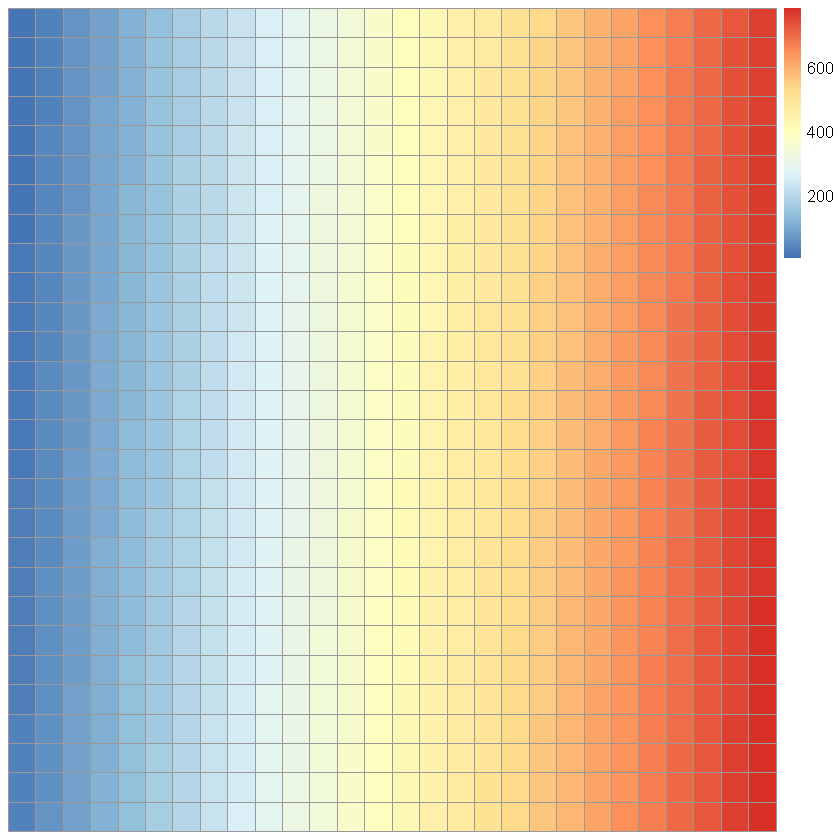

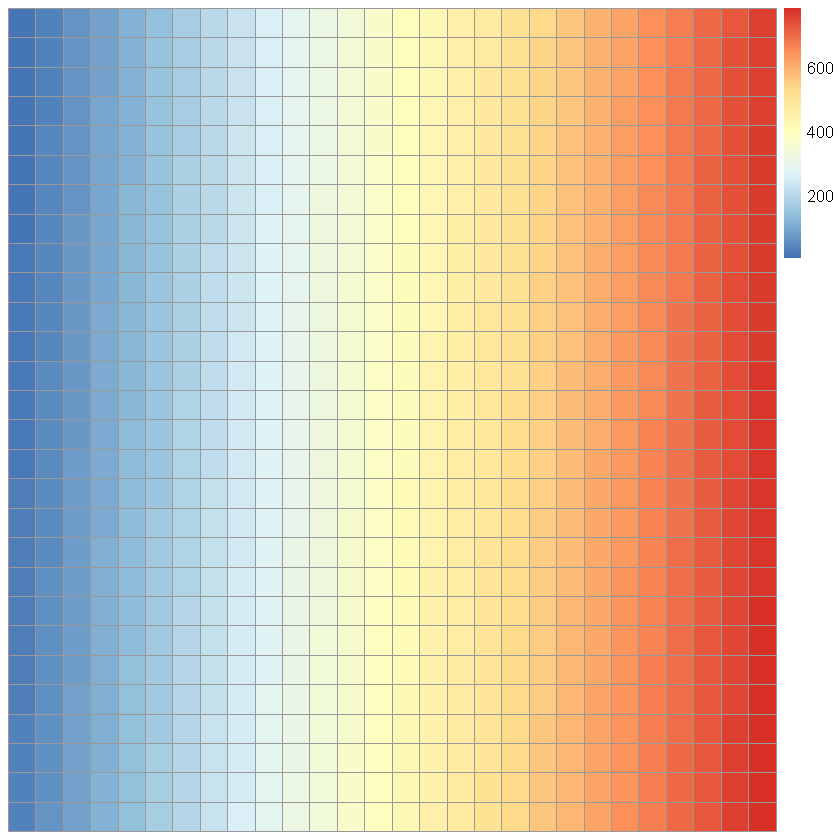

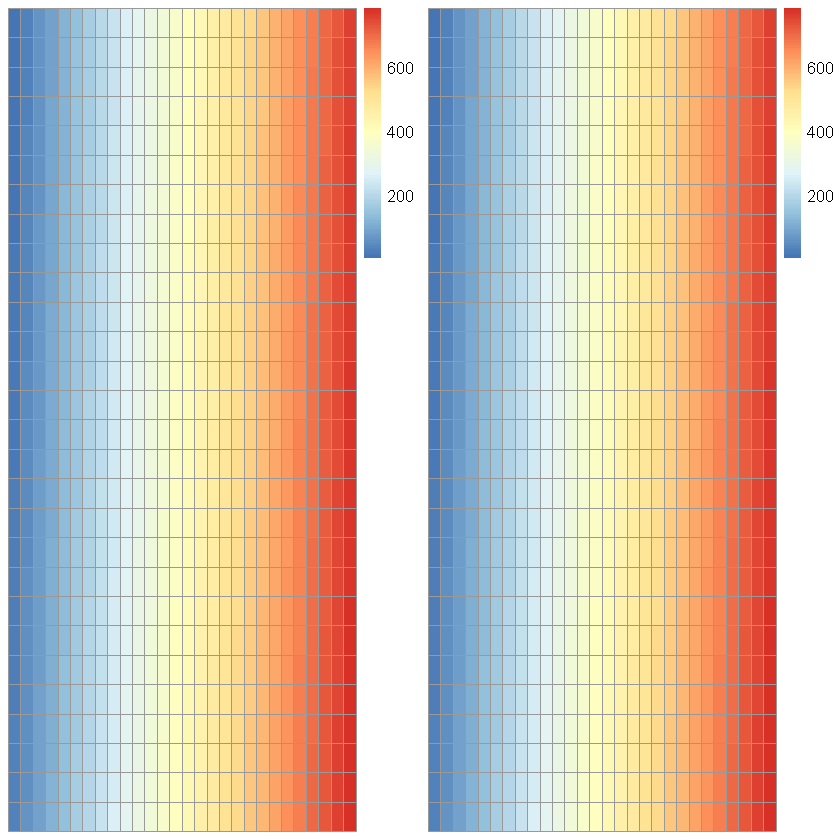

In [1]:
# Ülesanne 2.1b

library(pheatmap)
library(gridExtra)

plot_digit_pheatmap = function(digit){
  mat = matrix(as.numeric(1:784), nrow=28, ncol=28)
  pheatmap(mat, cluster_cols=FALSE, cluster_rows=FALSE)
}

# Näide jooniste ruudustikus joonistamisest
plot_list = vector(mode = "list", length = 2) # jooniste kogumiseks, length määrab objektide arvu
plot_list[[1]] <- plot_digit_pheatmap(1:784)[[4]] # Pheatmapi tagastab igasugust mudru aga 4-s element on joonis
plot_list[[2]] <- plot_digit_pheatmap(784:1)[[4]]
grid.arrange(arrangeGrob(grobs = plot_list, ncol=2, nrow = 1)) # Joonistab joonised ruudustikku


# sinu kood

c. Sorteeri andmestiku read selliselt, et üleval oleksid nullid ja all ühed. Visualiseeri kogu andmestikku kasutadaes `pheatmap` funktsiooni. Kasuta argumente `cluster_rows=FALSE, cluster_cols=FALSE`. Abiks on [pheatmap minimalistlik näide](../praktikum6_pheatmap_minimal).


In [ ]:
# Ülesanne 2.1c
# sinu kood

d. **Küsimus:** Miks on punased triibud vaheldumisi sinistega?

**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

### Ülesanne 2.2 (4 punkti)

a. Tee andmestikul PCA (kontrolli, et oled eelnevalt andmestikust eemaldanud tunnuse label). PCA tegemiseks kasuta funktsiooni `prcomp`. Abiks on [PCA minimalistlik näide](../praktikum6_pca_minimal). 

In [ ]:
# Ülesanne 2.2a
# sinu kood


b. **Küsimus:** Eelmisel korral vaatasid videot, kus näidati, et vahel on andmestiku "efektiivne dimensionaalsus" väiksem kui tunnuste arv. Milline on sinu arvates andmestiku "efektiivne dimensionaalsus" praegusel juhul?

**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

c. Tee hajuvusdiagramm PC1 vs PC2. Seejärel märgi joonisele, millised punktid kujutavad numbrit 0 ja millised numbrit 1 (võid kasutada värvi või argumenti `pch`).

In [ ]:
# Ülesanne 2.2c
# sinu kood


d. **Küsimus:** Mida võiks selle joonise põhjal tähistada PC1?

**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

e. Visualiseeri PCA kaalusid.

Näpunäited:

* Peakomponendid on lineaarkombinatsioonid esialgsetest tunnustest. Näiteks $PC1 = \beta_1 * intensiivsus_{\text{esimene_piksel}} + \beta_2 * intensiivsus_{\text{teine_piksel}} + \cdots + \beta_{784} * intensiivsus_{\text{viimane_piksel}}$.
* Tahame visualiseerida PC1 kaalusid $\beta_1, \cdots, \beta_{784}$
* Neid kaale saame visualiseerida sarnaselt numbritele (st 28 x 28 suuruse pildina)

In [ ]:
# Ülesanne 2.2e
# sinu kood


f. **Küsimus:** Millistel pikslitel on absoluutväärtuselt suured kaalud? Interpreteeri selle abil PC1 tähendust (milliste pikslite intensiivsus peab olema suur ja milliste pikslite intensiivsus madal, et PC1 väärtus oleks võimalikult suur).

**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

### Ülesanne 2.3 (4 punkti)

a. Tee nüüd PCA andmestikul, mis koosneb ainult nullidest. Lisaks tee hajuvusdiagramm PC1 vs PC2.

In [ ]:
# Ülesanne 2.3a
# sinu kood


b. **Küsimus:** Kas oskad selle joonise põhjal tõlgendada peakomponente PC1 ja PC2?

**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

c. Vali üheksa numbrit tasandi erinevatest nurkadest ja visualiseeri neid funktsiooni `plot_digit` abil. (Järgmisel joonisel on tähistatud punasena 25 punkti tasandi erinevatest nurkadest. Paremal pool on näidatud number 3 jaoks võimalik tulemus. Sinul piisab võtta analoogilisest võrestikust 9 punktikest ja visualiseerida neid numbreid.)

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum6/numbrid/pca_example2.png "Näide")

Näpunäide: Kasuks võib tulla funktsioon `identify`, mis aitab joonisele vajutades leida lähimad punktid. Uuri mida teeb järgmine koodiblokk:

In [ ]:
# Ülesanne 2.3c
x = c(1,2,3)
y = c(2,5,3)
plot(x, y)
identify(c(1,2,3), c(2,5,3), n=1)
# kliki joonisel ja jälgi konsooli

# sinu kood

d. **Küsimus:** Kuidas tõlgendad selle joonise põhjal peakomponente PC1 ja PC2?

**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

e. Punktikeste asemel visualiseeri numbreid. Lõpptulemus võiks välja näha umbes selline:

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum6/numbrid/nullid_pca.png "Näide")

Näpunäited:

* Kõigepealt joonista tühi aken.
```
plot(0, 0, type = "n", xlim=c(?, ?), ylim=c(?, ?))
```
* `for` tsükli abil lisa numbrid.
* Sul ei ole vaja joonistada kõiki numbreid, sest numbrid võivad kattuda. Võid joonistada näiteks 500 numbrit.
* Kui numbrid tulevad liiga väikesed, siis muuda argumenti `scale`.

Siin oleme ette andnud täiendatud `plot_digit` funktsiooni, mis muudab valge läbipaistvaks (mis on kasulik, kui numbrid joonistuvad üksteise peale). 

In [ ]:
plot_digit = function(digit, x=NA, y=NA, scale=1, add=FALSE, transparency=FALSE, ...){
  if(is.na(x)){
    x = 0
  }
  if(is.na(y)){
    y = 0
  }
  
  x_id = seq(x, x + scale, length=28)
  y_id = seq(y, y + scale, length=28)
  
  if(transparency==TRUE){
    tmp = as.character(round(seq(0, 0.99, length=256)*100))
    tmp[nchar(tmp) == 1] = paste("0", tmp[nchar(tmp) == 1], sep="")
    cols = colorRampPalette(c("#FFFFFF", "#000000"))(256)
    cols = paste(cols, tmp, sep="")
  }
  else{
    cols = grey(seq(1, 0, length = 256))
  }
  
  image(x_id, y_id, t(matrix(as.numeric(digit), nrow=28, ncol=28)[28:1, ]),
        col = cols, axes=F, asp=1, add=add, ...)
}



Minimaalne näide, kuidas `plot_digit` funktsiooni kasutada.

In [ ]:
plot(0, 0, type = "n", xlim=c(0, 10), ylim=c(0, 10), asp=1)

for(i in 1:5){
  x = runif(1, 0, 10) # vaja muuta
  y = runif(1, 0, 10) # vaja muuta
  
  plot_digit(nullid[i, -785], x, y, scale=1, add=TRUE, transparency = T)
}

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum6/numbrid/pca_vis_min.png "Näide")

In [ ]:
# Ülesanne 2.3e
# sinu kood


f. **Küsimus:** Kuidas tõlgendad selle joonise põhjal peakomponente PC1 ja PC2?

**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

g. Tee samasugune joonis nagu eelmises punktis esialgse nullide ja ühtede andmestiku peal.

In [ ]:
# Ülesanne 2.3g
# sinu kood


h. **Küsimus:** Kuidas tõlgendad selle joonise põhjal peakomponente PC1 ja PC2?

**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

### Boonusülesanne 2.1 (2 punkti) - implementeeri PCA

Selle ülesande eesmärk on implementeerida omaenda PCA. Võid kasutada järgnevat pseudokoodi. 

PCA pseudokood:

1. Tsentreeri andmestik (ehk lahuta igast tunnusest tema keskmine).  
Tähistame tsentreeritud andmemaatriksit $X$ (vaatlused ridades, tunnused veergudes). 

2. Arvuta kovariatsioonimaatriks $X^T X$. (Näpunäide: maatriksite korrutamiseks on R-is operaator `%*%`, transponeerimiseks funktsioon `t()`.)

3. Leia kovariatsioonimaatriksi omaväärtused ja omavektorid. (Näpunäide: Abiks on funktsioon `eigen`)

4. Esimese omavektori elemendid on PC1 kordajad, teise omavektori elemendid PC2 kordajad jne. 
Kasuta nüüd neid kordajaid, et leida kõigi andmepunktide jaoks PC1 ja PC2 väärtus. Selleks tuleb vastavad lineaarkombinatsioonid arvutada kõigi $X$ ridade jaoks. 

> Näiteks kui esimese omavektori elemendid on $\alpha_1, \alpha_2, ..., \alpha_k$, siis PC1 saadakse tsentreeritud tunnuste lineaarkombinatsioonina $PC_1 = \alpha_1 X_{1} + \alpha_2 X_{2} + ... + \alpha_k X_{k}$. Siin $X_1$ tähistab tsentreeritud esimest tunnust, $X_2$ teist jne. 

5. Tagasta PC1 ja PC2 väärtused. 

6. Võrdle minimaalse näite põhjal, kas sinu PCA annab samu tulemusi, mis `prcomp`.

In [ ]:
# Ülesanne B2.1
# sinu kood


### Boonusülesanne 2.2 (2 punkti) - klassifitseeri numbreid

Paku välja moodus, kuidas pikslite põhjal eristada numbreid 0 ja 1. Leia mitmel juhul sinu meetod prognoosib õigesti, mitmel juhul valesti ja raporteeri täpsus (õigete klassifitseerimiste arv koguarvust). Võiksid täpsuseks saada vähemalt 90%.

In [ ]:
# Ülesanne B2.2
# sinu kood


# III osa - riigikogu hääletusmustrid

### Sissejuhatus

Maidu "Parem" Käsi haaras lapsena kaisukaru küll vasaku käega, kuid ema sõnad "vasak on paha, parem on parem" ei teinud tast ainult paremakäelist, vaid need jäid alatiseks meelde. Näiteks meeldib Maidule kinos istuda kõige parempoosel pingil ja valimistel hääletada kõige parempoolse poliitiku poolt.
Aga kuidas Maidu teab, kes on kõige parempoolne poliitik?

Selles ülesanneteblokis vaatamegi, kas peakomponentanalüüsi abil on võimalik poliitikuid liigitada vasak- ja parempoolseteks ning milline on parlamendis valitsev kambavaim.

### Andmestik

Tegeleme andmestikuga, mis kajastab Riigikogu 13. koosseisu hääletusi. Kui viienda kodutöö neljandas ülesandes tuli alla kraapida vaid hümni seaduse tagasilükkamise tulemusi, siis käesolevalt on kasutada kõikide hääletuste tulemusi (välja on jäetud kohaloleku kontrolli ja muud mittesisukad hääletused). Täpsemalt on andmestikus tunnused:

* Nimi - saadiku nimi
* Fraktsioon - millisesse fraktsiooni kuulus saadik (kui saadik vahetas fraktsiooni, siis on näidatud kõige sagedasem fraktsioon, kuhu saadik Riigikogu XIII vältel kuulunud on)
* Otsus - saadiku otsus (Poolt, Vastu, Erapooletu, Ei hääletanud, Puudub)
* kpv - hääletuse kuupäev
* id - hääletuse id

Laadi alla andmestik [*Riigikogu_XIII.csv*](../data/Riigikogu_XIII.csv) ja loe töökeskkonda.


### Ülesanne 3.1 (2 punkt) - andmestiku mudimine

a) Muuda tunnus *Otsus* numbriliseks. Selleks kodeeri hääletused järgmiselt:

* *Vastu* tähista arvuga -1
* *Poolt* tähista arvuga 1
* *Puudub, Erapooletu, Ei hääletanud* tähista arvuga 0

Pane tähele, et väärtused oleksid numbrilised mitte sõned.

b) Jäta välja saadikud, keda esineb andmestikus alla 5 korra.

In [ ]:
# Ülesanne 3.1
# sinu kood


### Ülesanne 3.2 (3 punkti) - visualiseeri andmeid heatmapi abil

a) Sorteeri andmestiku read fraktsiooni põhjal ja visualiseeri neid heatmapi abil. Tõlgenda tulemusi (lisa koodi kommentaarina).

Näpunäide: 

* Selleks, et kasutada näiteks funktsiooni `pheatmap`, tuleb tekitada andmemaatriks, kus ridades on numbrilisele kujule viidud saadikute hääletused.

In [ ]:
# Ülesanne 3.2a
# sinu kood + tõlgendus


b) Visualiseeri andmestikku heatmapi abil, aga seekord klasterda read. Tõlgenda tulemusi.

In [ ]:
# Ülesanne 3.2b
# sinu kood + tõlgendus


c) Visualiseeri andmestikku heatmapi abil, aga seekord klasterda nii read kui veerud. Tõlgenda tulemusi.

In [ ]:
# Ülesanne 3.2c
# sinu kood + tõlgendus



### Ülesanne 3.3 (1 punkt)

Riigikogu 2015. aasta valimised võitis Reformierakond ning koalitsioonilepe sõlmiti REF, IRL ja SDE vahel. 2016. aasta sügisel see koalitsioon purunes. Sellega lõppes Reformierakonna enam kui 17 aastat järjest valitsuses oleku ajajärk ning Eesti sai 11-aastase vahe järel mittereformierakondlasest peaministri. 23. novembril 2016 algas Jüri Ratase valitsus, kus koalitsiooni moodustasid KESK, IRL ja SDE. 

Jaga sisseloetud andmestik *data* kaheks alamandmestikuks *data1* ja *data2*. Esimene neist sisaldagu enne kuupäeva 2016-11-23 toimunud hääletusi. Andmestik *data2* sisaldagu hääletusi alates kuupäevast 2016-11-23.

Näpunäide:

* Andmestikus olev tunnus *kpv* on hetkel sõnalisel kujul. Muuda see tunnus kuupäev-tüüpi tunnuseks, kasutades funktsiooni `as.Date()` ja parameetrit `format = "%d.%m.%Y"`.


In [ ]:
# Ülesanne 3.3
# sinu kood


### Ülesanne 3.4 (3 punkti)

a) Tee PCA esialgsele andmestikule. Visualiseeri kahte esimest peakomponenti hajuvusdiagrammi abil, seejuures värvi punktid fraktsioonide alusel. Tõlgenda tulemusi.

Näpunäide:

* PCA tegemiseks on vaja kasutada laias formaadis andmestikku, kus iga saadik on eraldi real ja veergudes on toimunud hääletustele vastavad otsused.

In [ ]:
# Ülesanne 3.4a
# sinu kood + tõlgendus



b) Tee PCA nii andmestikule *data1* kui ka *data2*. Mõlemal juhul visualiseeri kahte esimest peakomponenti hajuvusdiagrammi abil, seejuures värvi punktid fraktsioonide alusel. Tõlgenda tulemusi.

In [ ]:
# Ülesanne 3.4b
# sinu kood + tõlgendus


### Ülesanne 3.5 (1 punkt)

a) Eelmises ülesandes rakendasid PCA-d andmestikule *data2* ja visualiseerisid seda kasutades kahte esimest komponenti. Kas piisab ka ühest komponendist?


**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

b) Kuidas võiks tõlgendada esimest peakomponenti? Kas see näitab vasak- ja parempoolsust?

> Vasakpoolsust iseloomustab püüd riigi kaudu teostada sotsiaalset ja majanduslikku võrdsustamist. Parempoolsust iseloomustab põhimõte, mille kohaselt iga ühiskonna liige on ise vastutav oma sotsiaalse ja majandusliku heaolu eest. [Vikipeedia](http://et.wikipedia.org/wiki/Eesti_erakonnad_vasak-parem-skaalal)


**<font color='red'>Vastus:</font>** Kirjuta vastus siia.

## <font color='red'>See oli viimane ülesanne! Palun jooksuta kogu Jupyter Notebook uuesti, et veenduda oma koodi töötamises! (`Kernel -> Restart and Run All`)</font>

# Mida on vaja esitada?

* I, II ja III osa kohta tuleb esitada vastustega Jupyter fail

Lahendused esitada [Moodle keskkonna](https://moodle.ut.ee/course/view.php?id=8013#section-1) kaudu.


## Lahendamise aeg

Lisaks võiksid mainida, kui palju aega kulus osa I, II ja III peale. Mida arvad ülesannetest (kasulikkus, huvitavus)?

**<font color='red'>Kodutöö I osa lahendamiseks kulus:</font>** X h

**<font color='red'>Kodutöö II osa lahendamiseks kulus:</font>** X h

**<font color='red'>Kodutöö III osa lahendamiseks kulus:</font>** X h

Ülesanded olid ... 

**Tänan vastamast!**